In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score


In [ ]:
#importing the dataset which is in csv file
data = pd.read_csv(r'/content/test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
#replacing + with space for filling the nan values data['Dependents']=data['Dependents'].str.replace('+','')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
#changing the datype of each float column to int
data['Gender']= data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self Employed']=data['Self_Employed'].astype('int64')
data['Coapplicant Income'] = data['Coapplicant Income'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

ValueError: ignored

In [ ]:
#balancing the database using smote
from imblearn.combine import SMOTETomek
smote=SMOTETomek
#dividing the dataset into dependent and independent y and x respectively
y = data['Loan_ID']
x = data.drop(columns=['Loan_ID'], axis=1)
#printing the values of y before balancing the data and after
print(y.value_counts())
print('y_bal.value_counts()')

LP001015    1
LP002389    1
LP002383    1
LP002376    1
LP002375    1
           ..
LP001627    1
LP001622    1
LP001613    1
LP001611    1
LP002989    1
Name: Loan_ID, Length: 367, dtype: int64
y_bal.value_counts()


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.321526,342.822888,0.839237
std,4910.685399,2334.232099,60.967295,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


<ipython-input-25-fdeae60e3d0f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'],color='r')
<ipython-input-25-fdeae60e3d0f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


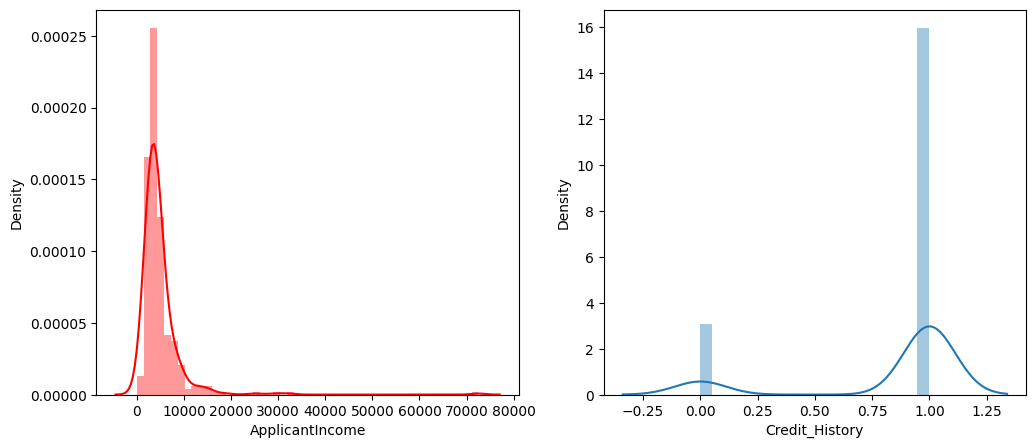

In [ ]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

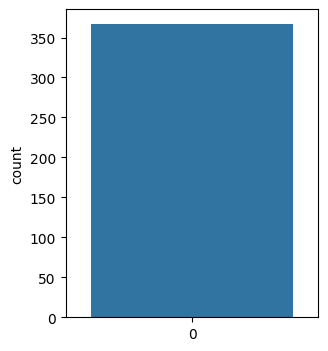

In [ ]:
#plotting the count plot
plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.countplot(data['ApplicantIncome'])
plt.subplot(1,4,1)
sns.countplot(data['CoapplicantIncome'])
plt.show()

ValueError: ignored

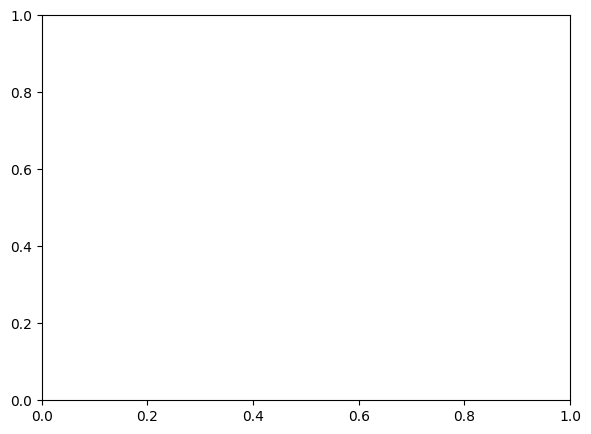

In [ ]:
#visualising two colunms against each other
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data['Married'], hue=data['Gender'])
plt.subplot(122)
sns.countplot(data['Self Employed'], hue=data['Education'])
plt.subplot(133)
sns.countplot(data['Property_Area'], hue=data['Loan_Amount_Term'])

In [ ]:
#visulaized based gender and income what would be the appplication status
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

KeyError: ignored

In [ ]:
# perfroming feature Scaling op[eration using standard scaller on X part of the dataset because
# there different type of values in the columns
sc = StandardScaler()
x_bal=sc.fit_transform('x_bal')
x_bal = pd.DataFrame('x_bal,columns-names')

UsageError: Line magic function `%sc=` not found.


In [ ]:
#splitting the dataset in train and test on balnmced datasew
('X_train,X_test, y_train, y_test = train_test_split( x_bal,y_bal, test_size=0.33,random_state=42')

'X_train,X_test, y_train, y_test = train_test_split( x_bal,y_bal, test_size=0.33,random_state=42'

In [ ]:
#importing and building the desicion tree model
def decisionTree(x_train,x_test, y_train, y_test):
dtc= DecisionTreeClassifier()
dtc.fit('x_train,y_train')
yPred = dtc.predict('x_test')
print('***DecisionTreeClassifier***') 
print('Confusion matrix')
print(confusion_matrix('y_test,yPred'))
print('Classification report')
print(classification_report('y_test ,yPred'))

In [ ]:
def randomForest(x_train, x_test, y_train, y_test)
rf = RandomForestClassifier()
rf.fit(x_train,y_train) 
yPred rf.predict(x_test)
print('Classification report')
print('***RandomForestClassifier***')
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print(classification_report(y_test,yPred))

In [ ]:
def KNN(x_train, x_test, y_train, y_test):
knn = KNeighborsClassifier()
yPred = knn.predict(x_test)
knn.fit(x_train,y_train) 
print('***KNeighborsClassifier****)
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report') 
print(classification_report(y_test,yPred))

In [ ]:
def xgboost (x_train, x_test, y_train, y_test):
xg = GradientBoostingClassifier()
xg.fit(x_train,y_train)
yPred = xg.predict(x_test)
print(****GradientBoostingClassifier***')
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report')
print(classification_report(y_test,yPred))

SyntaxError: ignored

In [ ]:
# Importing the Keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
[226] # Initialising the ANN 
classifier = Sequential()

In [ ]:
 [227] # Adding the input layer and the first hidden layer
classifier.add(Dense (units=100, activation='relu', input_dim=11))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense (units=50, activation='relu'))

NameError: ignored

In [ ]:
 # Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [ ]:
 # Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

NameError: ignored

In [ ]:
#Fitting .the. ANN. to. the .Training.set
model_history = classifier.fit (x_train, y_train, batch_size =100, validation_split = 0.2, epochs = 100)


In [ ]:
#Gender Married Dependents Education Self Employed Applicant Income Coapplicant Income LoanAmount Loan_Amount_Term Credit_History Property
dtr.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

In [ ]:
#Gender Married Dependents Education Self Employed Applicant Income Coapplicant Income Loan Amount Loan Amount Term Credit_History Property_Area
rfr.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

In [ ]:
#Gender Married Dependents Education Self Employed Applicant Income Coapplicant Income Loan Amount Loan Amount Term Credit_History Property Area 
knn.predict([[1,1, 8, 1, 1, 4276, 1542,145, 248, 0,1]])

In [ ]:
#Gender Married Dependents Education Self Employed Applicant Income Coapplicant Income LoanAmount Loan_Amount Term Credit_History Property_Area 
xgb.predict([[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]])

In [ ]:
classifier.save("loan.h5")

NameError: ignored

In [ ]:
#ptrdecting the test set results
y_pred= classifier.predict(x_test)

NameError: ignored

In [ ]:
y_pred

In [ ]:
def predict_exit(sample_value):
  #Convert list to numpy array
  Sample_value = np.array(sample_value)
  # Reshape because sample value contains only 1 record sample_value = sample_value.reshape(1, -1)
  # Feature Scaling
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_val)

In [ ]:
y_pred = (y_pred>0.5)
y_pred

In [ ]:
#Predictions
# Value order 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain', 'Female',Male'.
sample_value = [[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]] 
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of Loan Approval!')
else:
  print('Prediction: Low chance Loan Approval.')

In [ ]:
# Predictions
# Value order 'Creditscore', 'Age', 'Tenure', 'Balance', 'NumofProducts', 'HasCrCard', 'IsActiveMember', 'Estimatedsalary', 'France', 'Germany', 'Spain', 'Female',Male'.
sample_value = [1,0, 1, 1, 1, 45, 14,45, 240, 1,1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of Loan Approval!') 
else:
  print('Prediction: Low chance of Loan Approval.')

In [ ]:
def predict_exit(sample_value):
# Convert list to numpy array
sample_value = np.array(sample_value)
# Reshape because sample value contains only 1 record sample_value = sample_value.reshape(1, -1)
# Feature Scaling
sample_value = sc.transform(sample_value)
return classifier.predict(sample_value)

In [ ]:
# Predictions
# Value order 'creditscore', 'Age', 'Tenure', 'Balance', 'NumOfProducts", 'HasCrCard", "IsActiveMember', 'Estimatedsalary', 'France', 'Germany', 'Spain', 'Female',Male'.
sample_value = [[1,1, 0, 1, 1, 4276, 1542,145, 240, 0,1]] 
if predict_exit(sample_value)>0.5:
  print("Prediction: High chance of Loan Approval!')
else: 
   print("Prediction: Low chance Loan Approval.')

In [ ]:
# Predictions
# Value order 'CreditScore","Age', 'Tenure', 'Balance', 'NumOfProducts", "HasCrCard", "IsActiveMember', 'EstimatedSalary', 'France', 'Germany', 'Spain', 'Female', Male'.
sample_value = [[1,0, 1, 1, 1, 45, 14,45, 248, 1,1]]
if predict_exit(sample_value)>0.5:
print("Prediction: High chance of Loan Approval!') 
else:
print('Prediction: Low chance of Loan Approval.')

In [ ]:
compareModel('x_train,x_test,y_train,y_test') 

In [ ]:
def compareModel(x_train,x_test,y_train,y_test): 
decisionTree(X_train,x_test,y_train,y_test)
print('-'*100)
RandomForest(X_train,x_test,y_train,y_test)
print('-'*100)
XGB(X_train,x_test,y_train,y_test) 
print('-'*100)
KNN(X_train,X_test,y_train,y_test) 
print('-'*100)

In [ ]:
yPred = classifier.predict(x_test) 
print(accuracy_score (y_pred,y_test)) 
print("ANN Model") 
print("Confusion_Matrix")
print(confusion_matrix(y_test,y_pred)) 
print("Classification Report") 
print(classification_report(y_test,y_pred))

In [ ]:
#saving the model by using pickle function
pickle.dump(model,open('rdf.pkl','wb'))

NameError: ignored